<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/M%C3%B3dulo_5%20IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

## **Módulo 5 - Modelos de Predicción**


----

**Datos generales**
---
**Alumna:**

| Nombre | Matrícula del estudiante
|---|---|
| Helmy Andrea Moreno Navarro | **A01793918** |


>**Materia:** Módulo IBM (Gpo 10)

>**Profesora Titular:** María de la Paz Rico


09 de noviembre 2022


#Evaluación y refinamiento del modelo



## Objetivos

Después de completar este laboratorio, podrá:

* Evaluar y refinar el modelo de predicción


<h2>Tabla de contenido</h2>
<ul>
    <li><a href="https://#ref1">Evaluación del modelo</a></li>
    <li><a href="https://#ref2">Over-fitting, Under-fitting y Selección de Modelo</a></li>
    <li><a href="https://#ref3">Ridge Regression </a></li>
    <li><a href="https://#ref4">Grid Search</a></li>
</ul>


<h4>Configuración</h4>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import constants

This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

you will need to download the dataset; if you are running locally, please comment out the following


In [ ]:
df = pd.read_csv(path)

Primero, usemos solo datos numéricos:


In [ ]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Bibliotecas para plotear:

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Funciones para graficar</h2>


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Parte 1: Entrenamiento y Pruebas</h2>

<p>Un paso importante para probar su modelo es dividir sus datos en datos de entrenamiento y prueba. Colocaremos el <b>precio</b> de datos objetivo en un marco de datos separado <b>y_data</b>:</p>


In [ ]:
y_data = df['price']

Coloque los datos de precios en el marco de datos **x_data**:

In [ ]:
x_data=df.drop('price',axis=1)

Ahora, dividimos aleatoriamente nuestros datos en datos de entrenamiento y prueba usando la función <b>train_test_split</b>.


In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


El parámetro <b>test_size</b> establece la proporción de datos que se dividen en el conjunto de prueba. En lo anterior, el conjunto de prueba es el 10% del conjunto de datos total.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta  #1:</h1>

<p>Use la función "train_test_split" para dividir el conjunto de datos de modo que el 40% de las muestras de datos se utilicen para la prueba. Establezca el parámetro "random_state" igual a cero. La salida de la función debe ser la siguiente: "x_train1", "x_test1", "y_train1" y "y_test1".</p>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


Importemos <b>LinearRegression</b> desde el módulo <b>linear_model</b>


In [ ]:
from sklearn.linear_model import LinearRegression

Creamos un objeto de Regresión Lineal:


In [ ]:
lre=LinearRegression()

Ajustamos el modelo usando la característica "horsepower":

In [ ]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculemos el R ^ 2 en los datos de prueba:


In [ ]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

We can see the R^2 is much smaller using the test data compared to the training data.


In [ ]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta #2): </h1>
<b>
Encuentre el R^2 en los datos de prueba usando el 40 % del conjunto de datos para la prueba.
</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

A veces no tiene suficientes datos de prueba; como resultado, es posible que desee realizar una validación cruzada. Repasemos varios métodos que puede usar para la validación cruzada.

<h2>Cross-Validation Score</h2>


Importemos <b>model_selection</b> desde el módulo <b>cross_val_score</b>.


In [ ]:
from sklearn.model_selection import cross_val_score

Introducimos el objeto, la característica ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

La puntuación predeterminada es R^2. Cada elemento de la matriz tiene el valor promedio de R^2 para el pliegue:

In [ ]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Podemos calcular el promedio y la desviación estándar de nuestra estimación:


In [ ]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


Podemos usar el error cuadrático negativo como puntaje configurando la métrica del parámetro 'puntuación' en 'neg_mean_squared_error'.

In [ ]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta #3): </h1>

<p>
Calcule el R ^ 2 promedio usando dos pliegues, luego encuentre el R ^ 2 promedio para el segundo pliegue utilizando la función "caballos de fuerza":
</p>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

También puede usar la función 'cross_val_predict' para predecir la salida. La función divide los datos en el número especificado de pliegues, con un pliegue para prueba y los otros pliegues se usan para entrenamiento. Primero, importa la función:


In [ ]:
from sklearn.model_selection import cross_val_predict

Ingresamos el objeto, la función <b>"caballos de fuerza"</b> y los datos de destino <b>y_data</b>. El parámetro 'cv' determina el número de pliegues. En este caso, es 4. Podemos producir una salida:


In [ ]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2 id="ref2">Part 2: Overfitting, Underfitting y Model Selection</h2>

<p>Resulta que los datos de prueba, a veces denominados "datos fuera de muestra", son una medida mucho mejor del rendimiento de su modelo en el mundo real. Una de las razones de esto es el sobreajuste.

Repasemos algunos ejemplos. Resulta que estas diferencias son más evidentes en la regresión lineal múltiple y la regresión polinomial, por lo que exploraremos el sobreajuste en ese contexto.</p>


Vamos a crear objetos de regresión lineal múltiple y entrenar el modelo usando  <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> como características.


In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()


Predicción usando datos de entrenamiento:


In [ ]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])


Predicción utilizando datos de prueba:


In [ ]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Realicemos una evaluación del modelo usando nuestros datos de entrenamiento y prueba por separado. Primero, importamos la biblioteca seaborn y matplotlib para el trazado.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Examinemos la distribución de los valores predichos de los datos de entrenamiento.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


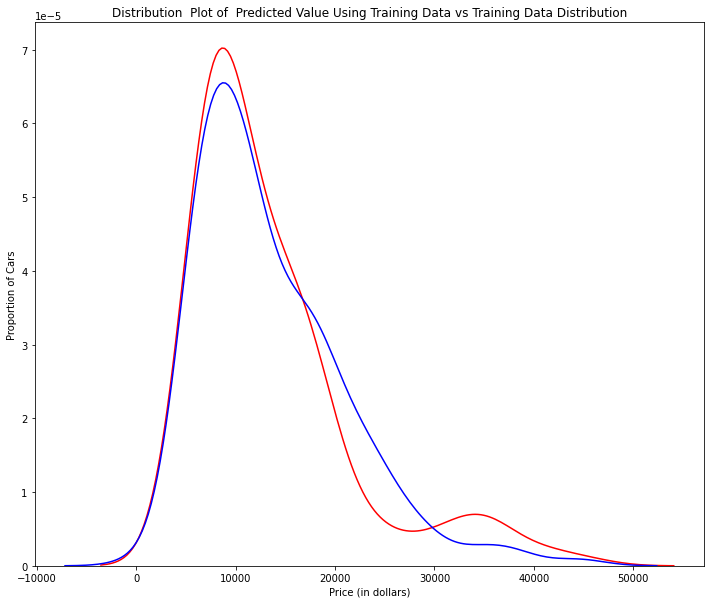

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


Hasta ahora, el modelo parece estar aprendiendo bien del conjunto de datos de entrenamiento. Pero, ¿qué sucede cuando el modelo encuentra nuevos datos del conjunto de datos de prueba? Cuando el modelo genera nuevos valores a partir de los datos de prueba, vemos que la distribución de los valores predichos es muy diferente de los valores objetivo reales.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


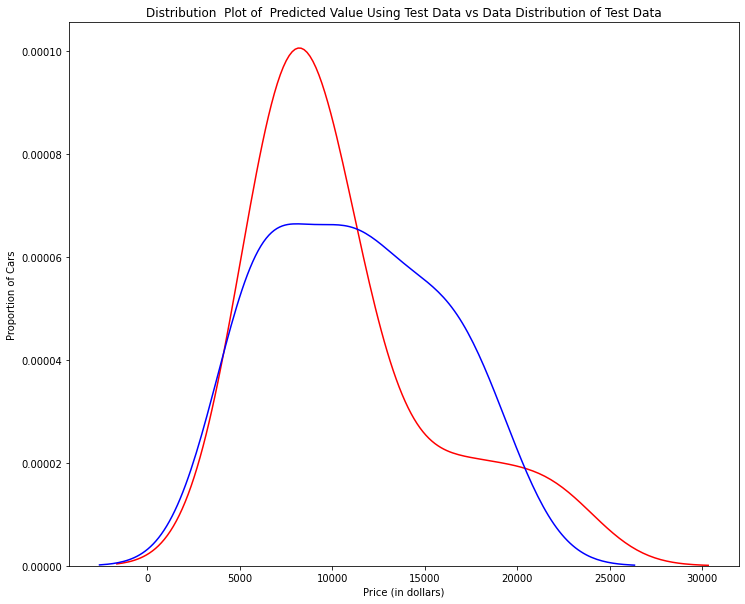

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Al comparar la **Figura 1** y la **Figura 2**, es evidente que la distribución de los datos de prueba en la Figura 1 es mucho mejor para ajustar los datos. Esta diferencia en la Figura 2 es evidente en el rango de 5000 a 15,000. Aquí es donde la forma de la distribución es extremadamente diferente. Veamos si la regresión polinomial también muestra una caída en la precisión de la predicción al analizar el conjunto de datos de prueba.</p>


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting ocurre cuando el modelo se ajusta al ruido, pero no al proceso subyacente. Por lo tanto, al probar su modelo con el conjunto de prueba, su modelo no funciona tan bien ya que está modelando ruido, no el proceso subyacente que generó la relación. Vamos a crear un modelo polinomial de grado 5.</p>

Usemos el 55 por ciento de los datos para entrenamiento y el resto para pruebas:


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Realizaremos una transformación polinomial de grado 5 en la característica <b>'caballos de fuerza'</b>.


In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Ahora, creemos un modelo de regresión lineal "poli" y entrenémoslo.


In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Podemos ver la salida de nuestro modelo usando el método "predecir". Asignamos los valores a "yhat".

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

Let's take the first five predicted values and compare it to the actual targets.


In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


In [ ]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:


In [ ]:
poly.score(x_train_pr, y_train)

R^2 of the test data:


In [ ]:
poly.score(x_test_pr, y_test)

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.


In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
pr1=PolynomialFeatures(degree=2)

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


```

</details>


<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
x_train_pr1.shape #there are now 15 features


```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
poly1=LinearRegression().fit(x_train_pr1,y_train)


```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
#The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

```

</details>


<h2 id="ref3">Part 3: Ridge Regression</h2> 


In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


Let's perform a degree two polynomial transformation on our data.


In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [ ]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [ ]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [ ]:
RigeModel.fit(x_train_pr, y_train)

Similarly, you can obtain a prediction:


In [ ]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:


In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

We can plot out the value of R^2 for different alphas:


In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

```

</details>


<h2 id="ref4">Part 4: Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [ ]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [ ]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

Create a Ridge regression object:


In [ ]:
RR=Ridge()
RR

Create a ridge grid search object:


In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model:


In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [ ]:
BestRR=Grid1.best_estimator_
BestRR

We now test our model on the test data:


In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                         |
| ----------------- | ------- | ---------- | ------------------------------------------ |
| 2022-08-23        | 2.4     | Malika     | Updated packages by adding keep_going=True |
| 2020-10-30        | 2.3     | Lakshmi    | Changed URL of csv                         |
| 2020-10-05        | 2.2     | Lakshmi    | Removed unused library imports             |
| 2020-09-14        | 2.1     | Lakshmi    | Made changes in OverFitting section        |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab         |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
